In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [4]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (60000, 784)
Test shape: (10000, 784)


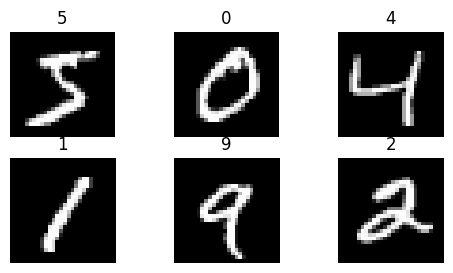

In [5]:
plt.figure(figsize=(6,3))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
k_values = [3,5,7,9]
accuracies = []


In [8]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k}, Accuracy={acc:.4f}")

K=3, Accuracy=0.9452
K=5, Accuracy=0.9443
K=7, Accuracy=0.9433
K=9, Accuracy=0.9429


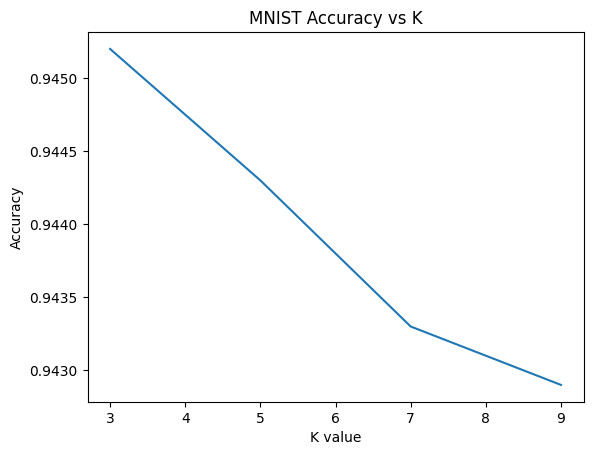

In [9]:
plt.plot(k_values, accuracies)
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("MNIST Accuracy vs K")
plt.show()

In [10]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [11]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[ 967    0    1    3    0    4    5    0    0    0]
 [   0 1127    3    0    1    0    3    0    1    0]
 [  12    9  967   15    2    0    5   11    9    2]
 [   0    4    5  963    2   14    0   12    8    2]
 [   1    9    5    2  922    2    7    4    3   27]
 [   7    0    6   21    4  828    9    2    7    8]
 [  13    4    2    0    3    9  925    0    2    0]
 [   0   22   12    4    7    2    0  953    1   27]
 [  15    3    9   24   10   22    3    7  874    7]
 [   5    6    6   11   17    7    0   28    3  926]]
